In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input/severity/train.csv
/kaggle/input/severity/test.csv
/kaggle/input/severity/sample_submission.csv


In [2]:
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df1 = pd.read_csv("/kaggle/input/severity/train.csv")
df2 = pd.read_csv("/kaggle/input/severity/test.csv")

In [4]:
y = df1.iloc[:,0].values

In [5]:
aid = df2['Accident_ID']

In [6]:
df1['Severity'].describe().count()

4

In [7]:
df1.describe()

,Safety_Score,Days_Since_Inspection,Total_Safety_Complaints,Control_Metric,Turbulence_In_gforces,Cabin_Temperature,Accident_Type_Code,Max_Elevation,Violations,Adverse_Weather_Metric,Accident_ID
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000
mean,41.876406,12.931100,6.564300,65.145324,0.381495,79.969331,3.814900,32001.803282,2.01220,0.255635,6266.554200
std,16.138072,3.539803,6.971982,11.882934,0.121301,2.759739,1.902577,9431.995196,1.03998,0.381128,3610.170288
min,0.000000,1.000000,0.000000,0.000000,0.134000,74.740000,1.000000,831.695553,0.00000,0.000316,2.000000
25%,30.593607,11.000000,2.000000,56.927985,0.293665,77.960000,2.000000,25757.636908,1.00000,0.012063,3139.750000
50%,41.278539,13.000000,4.000000,65.587967,0.365879,79.540000,4.000000,32060.336419,2.00000,0.074467,6280.500000
75%,52.511416,15.000000,9.000000,73.336372,0.451346,81.560000,5.000000,38380.641513,3.00000,0.354059,9391.500000
max,100.000000,23.000000,54.000000,100.000000,0.882648,97.510000,7.000000,64297.651218,5.00000,2.365378,12500.000000


In [8]:
df2.describe()

,Safety_Score,Days_Since_Inspection,Total_Safety_Complaints,Control_Metric,Turbulence_In_gforces,Cabin_Temperature,Accident_Type_Code,Max_Elevation,Violations,Adverse_Weather_Metric,Accident_ID
count,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000
mean,41.825224,12.946400,6.574800,65.368058,0.376197,79.993068,3.853600,32383.134179,1.990800,0.250886,6186.283200
std,16.280187,3.523364,7.179542,11.442005,0.116960,2.713833,1.877652,9485.096436,1.018592,0.387663,3602.235035
min,0.000000,1.000000,0.000000,20.966272,0.143376,74.740000,1.000000,831.695553,0.000000,0.000368,1.000000
25%,30.593607,11.000000,1.000000,57.702826,0.292583,77.930000,2.000000,26008.851717,1.000000,0.013136,3071.750000
50%,41.461187,13.000000,4.000000,66.066545,0.357404,79.600000,4.000000,32472.865497,2.000000,0.072466,6159.500000
75%,52.751142,15.000000,9.000000,73.119872,0.441699,81.530000,5.000000,38759.519071,3.000000,0.315407,9309.250000
max,100.000000,23.000000,54.000000,97.994531,0.881926,94.200000,7.000000,62315.408444,5.000000,2.365378,12493.000000


In [9]:
mp = {0 : 'Highly_Fatal_And_Damaging', 1 : 'Minor_Damage_And_Injuries', 2 : 'Significant_Damage_And_Fatalities', 3 : 'Significant_Damage_And_Serious_Injuries'}


In [10]:
from sklearn.preprocessing import LabelEncoder
lbl = LabelEncoder()
y = lbl.fit_transform(y)
print(y)

[1 1 2 ... 3 1 0]


In [11]:
df1 = df1.drop(['Severity'],axis = 1)

y1 = pd.DataFrame(y,columns = ['Severity'])

df1 = pd.concat([df1,y1], axis = 1)

In [12]:
df1.head()

,Safety_Score,Days_Since_Inspection,Total_Safety_Complaints,Control_Metric,Turbulence_In_gforces,Cabin_Temperature,Accident_Type_Code,Max_Elevation,Violations,Adverse_Weather_Metric,Accident_ID,Severity
0,49.223744,14,22,71.285324,0.272118,78.04,2,31335.476824,3,0.424352,7570,1
1,62.465753,10,27,72.288058,0.423939,84.54,2,26024.711057,2,0.352350,12128,1
2,63.059361,13,16,66.362808,0.322604,78.86,7,39269.053927,3,0.003364,2181,2
3,48.082192,11,9,74.703737,0.337029,81.79,3,42771.499200,1,0.211728,5946,3
4,26.484018,13,25,47.948952,0.541140,77.16,3,35509.228515,2,0.176883,9054,2


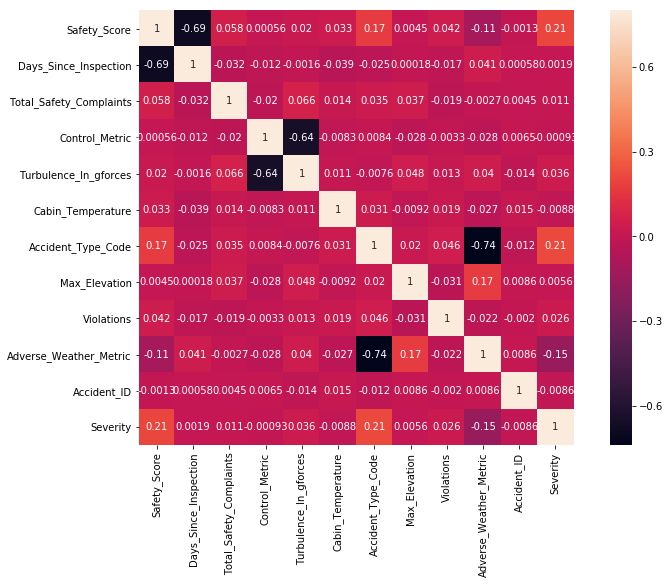

In [13]:
plt.figure(figsize = (13,8))
corrm = df1.corr()
sns.heatmap(corrm,vmax = .8,annot = True,square = True)
plt.show()

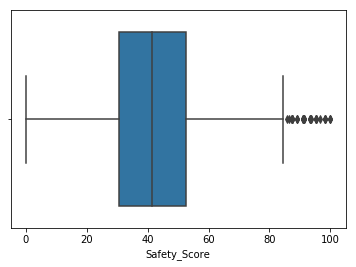

In [14]:
sns.boxplot(x = df1['Safety_Score'])

In [15]:
q1=df1["Safety_Score"].quantile(0.25)
q3=df1["Safety_Score"].quantile(0.75)
iqr=q3-q1
low=q1-1.5*iqr
high=q3+1.5*iqr
df1.Safety_Score.loc[df1["Safety_Score"] > high] = high

/opt/conda/lib/python3.6/site-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


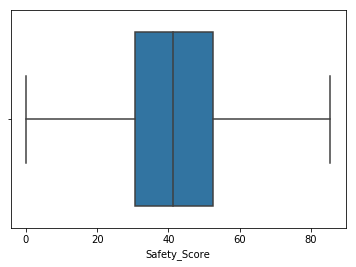

In [16]:
sns.boxplot(x = df1["Safety_Score"])

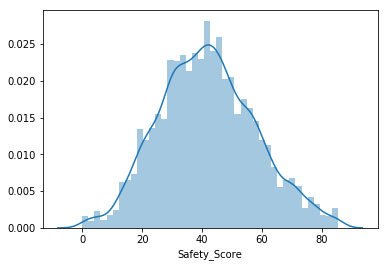

In [17]:
sns.distplot(df1['Safety_Score'])

In [18]:
df1['Safety_Score'].skew()

0.19422322193145916

In [19]:
df1['Safety_Score'].describe()

count    10000.000000
mean        41.845995
std         16.046736
min          0.000000
25%         30.593607
50%         41.278539
75%         52.511416
max         85.388128
Name: Safety_Score, dtype: float64

In [20]:
df2['Safety_Score'].skew()

0.12163355970364946

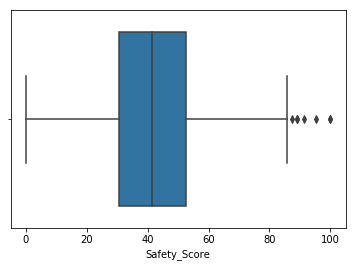

In [21]:
sns.boxplot(x = df2['Safety_Score'])

In [22]:
q1=df2["Safety_Score"].quantile(0.25)
q3=df2["Safety_Score"].quantile(0.75)
iqr=q3-q1
high=q3+1.5*iqr
df2.Safety_Score.loc[df2["Safety_Score"] > high] = high

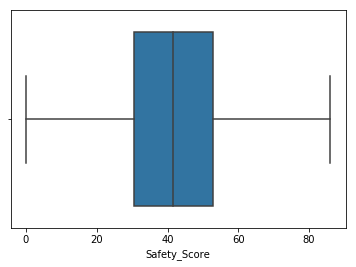

In [23]:
sns.boxplot(x = df2["Safety_Score"])

In [24]:
df1 = df1.drop(['Accident_ID'],axis = 1)
df2 = df2.drop(['Accident_ID'],axis = 1)


In [25]:
df1['Days_Since_Inspection'].describe()

count    10000.000000
mean        12.931100
std          3.539803
min          1.000000
25%         11.000000
50%         13.000000
75%         15.000000
max         23.000000
Name: Days_Since_Inspection, dtype: float64

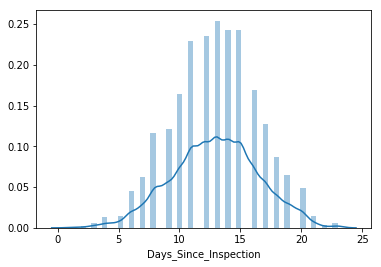

In [26]:
sns.distplot(df1['Days_Since_Inspection'])

In [27]:
df1['Days_Since_Inspection'].skew()

-0.07390962933953442

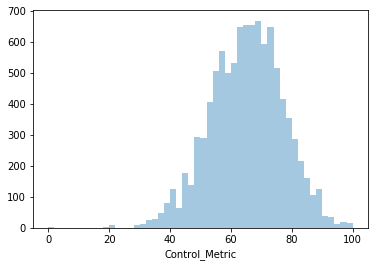

In [28]:
sns.distplot(df1['Control_Metric'],kde = False)

In [29]:
df1['Control_Metric'].describe()

count    10000.000000
mean        65.145324
std         11.882934
min          0.000000
25%         56.927985
50%         65.587967
75%         73.336372
max        100.000000
Name: Control_Metric, dtype: float64

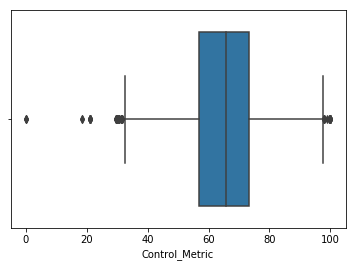

In [30]:
sns.boxplot(x = df1['Control_Metric'])

In [31]:
q1 = df1['Control_Metric'].quantile(0.25)
q3 = df1['Control_Metric'].quantile(0.75)
irq = q3-q1
low = q1 - 1.5 * irq
high = q3 + 1.5 * irq

In [32]:
df1.Control_Metric.loc[df1['Control_Metric'] < low] = low
df1.Control_Metric.loc[df1['Control_Metric'] > high] = high

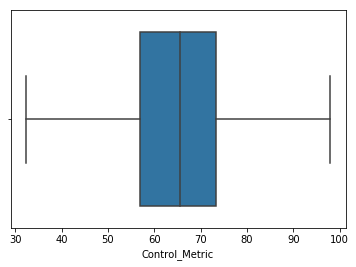

In [33]:
sns.boxplot(x = df1['Control_Metric'])

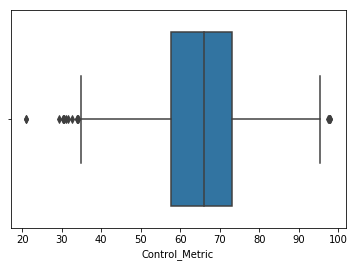

In [34]:
sns.boxplot(x = df2['Control_Metric'])

In [35]:
q1 = df2['Control_Metric'].quantile(0.25)
q3 = df2['Control_Metric'].quantile(0.75)
irq = q3-q1
low = q1 - 1.5 * irq
high = q3 + 1.5 * irq
df2.Control_Metric.loc[df2['Control_Metric'] < low] = low
df2.Control_Metric.loc[df2['Control_Metric'] > high] = high

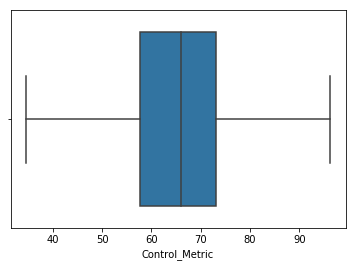

In [36]:
sns.boxplot(x = df2['Control_Metric'])

In [37]:
df1['Control_Metric'].skew()

-0.12720224493929194

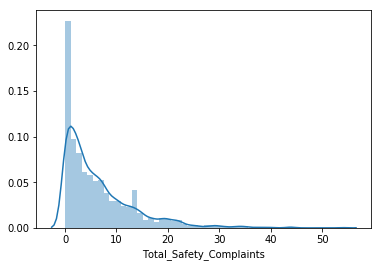

In [38]:
sns.distplot(df1['Total_Safety_Complaints'])

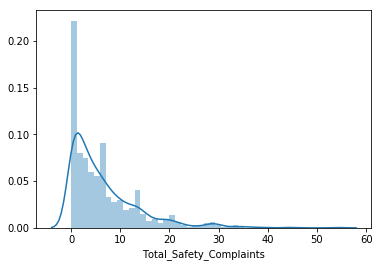

In [39]:
sns.distplot(df2['Total_Safety_Complaints'])

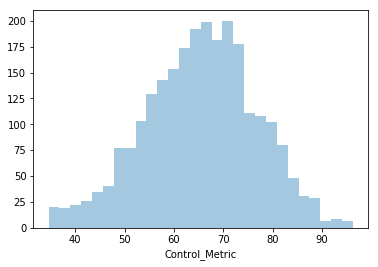

In [40]:
sns.distplot(df2['Control_Metric'],kde = False)

In [41]:
df1['Total_Safety_Complaints'] = df1['Total_Safety_Complaints'].map(lambda i: np.log(i+1) if i > 0 else 0) 


In [42]:
df2['Total_Safety_Complaints'] = df2['Total_Safety_Complaints'].map(lambda i: np.log(i+1) if i > 0 else 0) 

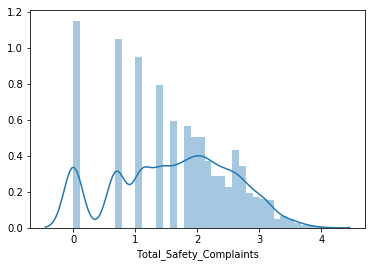

In [43]:
sns.distplot(df1['Total_Safety_Complaints'])

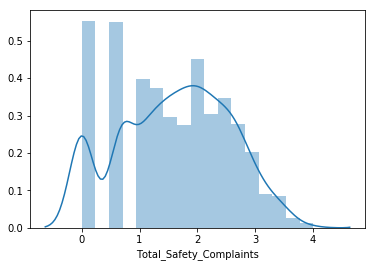

In [44]:
sns.distplot(df2['Total_Safety_Complaints'])

In [45]:
df1['Total_Safety_Complaints'].skew()

-0.14053160735391654

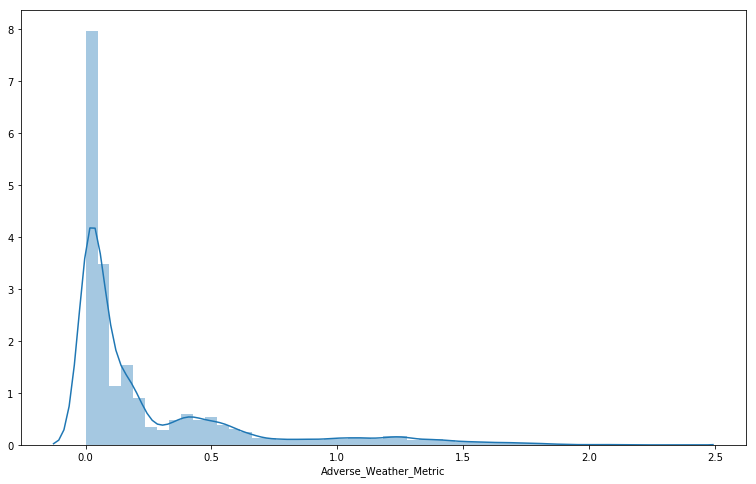

In [46]:
plt.figure(figsize=(13,8))
sns.distplot(df1['Adverse_Weather_Metric'])
plt.show()

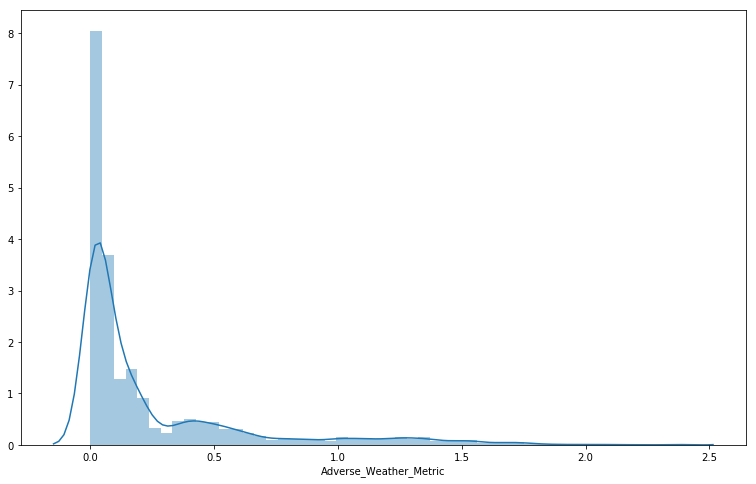

In [47]:
plt.figure(figsize=(13,8))
sns.distplot(df2['Adverse_Weather_Metric'])
plt.show()

In [48]:
df1['Adverse_Weather_Metric'] = df1['Adverse_Weather_Metric'].map(lambda i: np.log(i) if i > 0 else 0)

In [49]:
df2['Adverse_Weather_Metric'] = df2['Adverse_Weather_Metric'].map(lambda i: np.log(i) if i > 0 else 0)

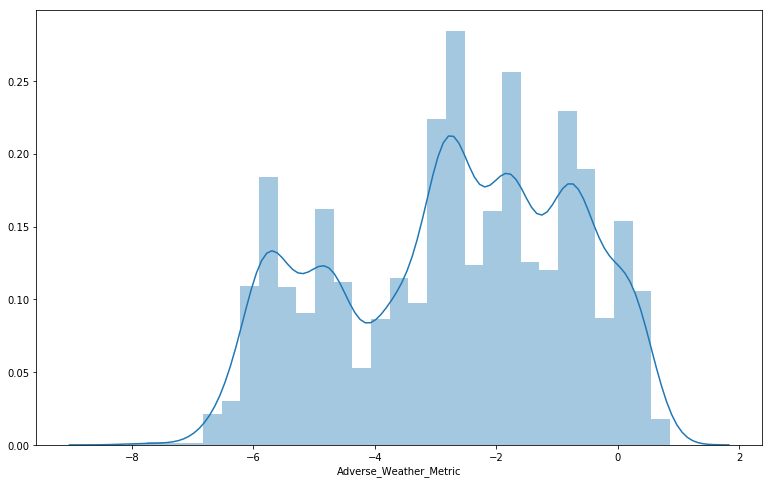

In [50]:
plt.figure(figsize=(13,8))
sns.distplot(df1['Adverse_Weather_Metric'])
plt.show()

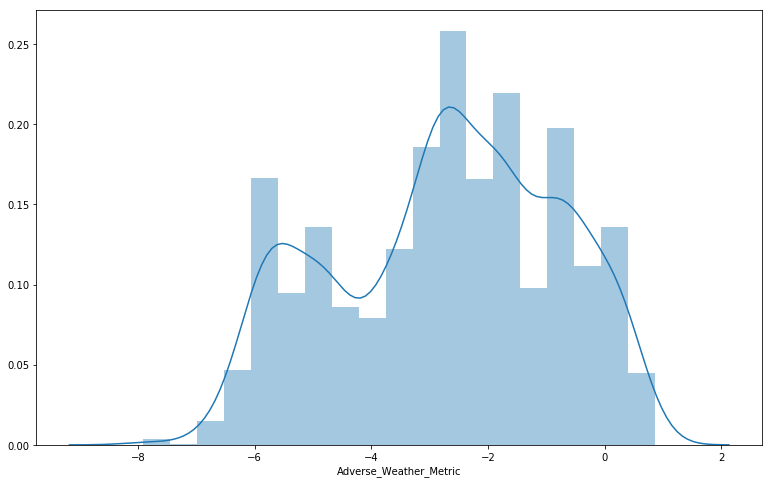

In [51]:
plt.figure(figsize=(13,8))
sns.distplot(df2['Adverse_Weather_Metric'])
plt.show()

In [52]:
df1['Adverse_Weather_Metric'].skew()

-0.25193351225330374

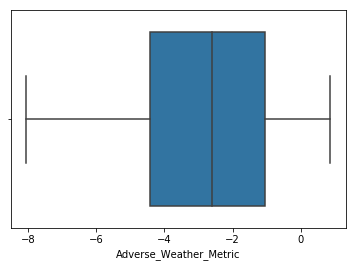

In [53]:
sns.boxplot(x = df1['Adverse_Weather_Metric'])

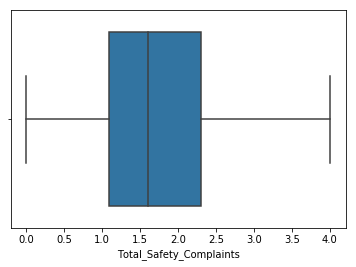

In [54]:
sns.boxplot(x = df1['Total_Safety_Complaints'])

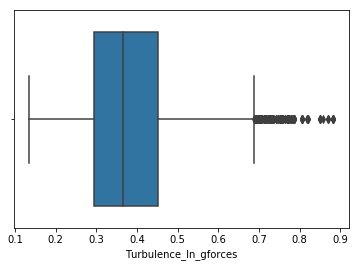

In [55]:
sns.boxplot(x = df1['Turbulence_In_gforces'])

In [56]:
q1 = df1['Turbulence_In_gforces'].quantile(0.25)
q3 = df1['Turbulence_In_gforces'].quantile(0.75)
irq = q3-q1
low = q1 - 1.5 * irq
high = q3 + 1.5 * irq

In [57]:
df1.Turbulence_In_gforces.loc[(df1['Turbulence_In_gforces'] < low)] = low
df1.Turbulence_In_gforces.loc[df1['Turbulence_In_gforces'] > high] = high

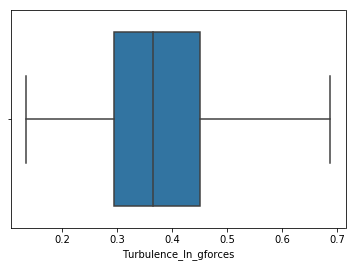

In [58]:
sns.boxplot(x = df1['Turbulence_In_gforces'])

In [59]:
q1 = df2['Turbulence_In_gforces'].quantile(0.25)
q3 = df2['Turbulence_In_gforces'].quantile(0.75)
irq = q3-q1
low = q1 - 1.5 * irq
high = q3 + 1.5 * irq

In [60]:
df2.Turbulence_In_gforces.loc[(df2['Turbulence_In_gforces'] < low)] = low
df2.Turbulence_In_gforces.loc[df2['Turbulence_In_gforces'] > high] = high

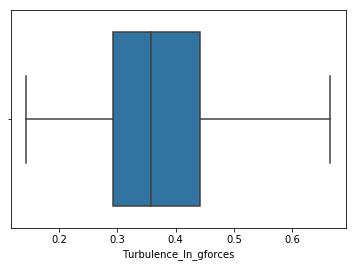

In [61]:
sns.boxplot(x = df2['Turbulence_In_gforces'])

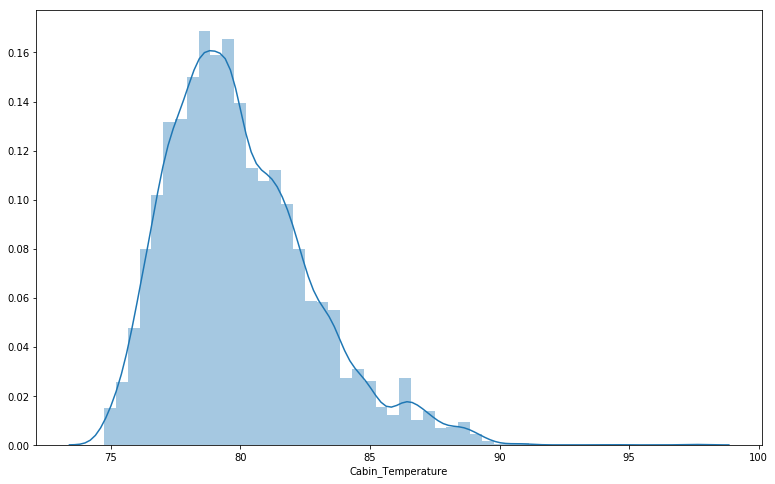

In [62]:
plt.figure(figsize=(13,8))
sns.distplot(df1['Cabin_Temperature'])
plt.show()

In [63]:
df1['Cabin_Temperature'].skew()

0.8544372674923707

In [64]:
df1['Cabin_Temperature'] = df1['Cabin_Temperature'].map(lambda i : np.log(i+1))
df2['Cabin_Temperature'] = df2['Cabin_Temperature'].map(lambda i : np.log(i+1))

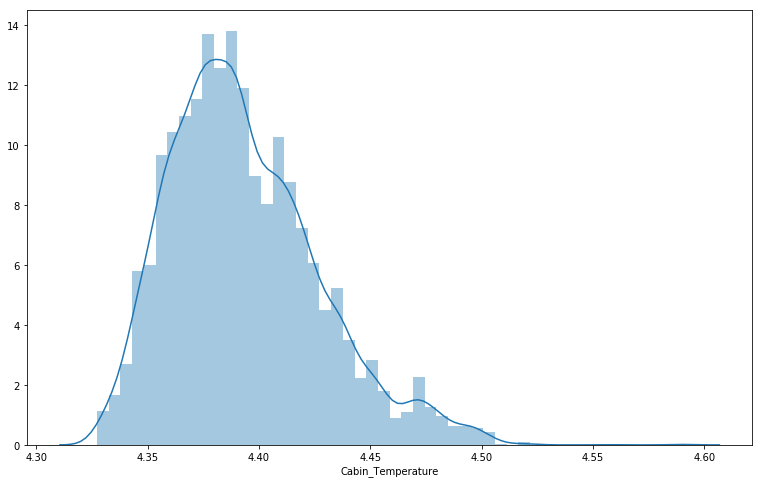

In [65]:
plt.figure(figsize=(13,8))
sns.distplot(df1['Cabin_Temperature'])
plt.show()

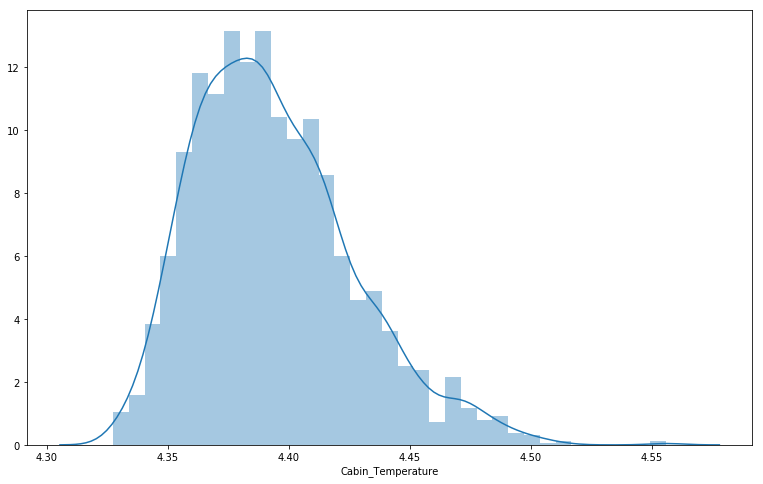

In [66]:
plt.figure(figsize=(13,8))
sns.distplot(df2['Cabin_Temperature'])
plt.show()

In [67]:
df1['Cabin_Temperature'].skew()

0.7500888797333504

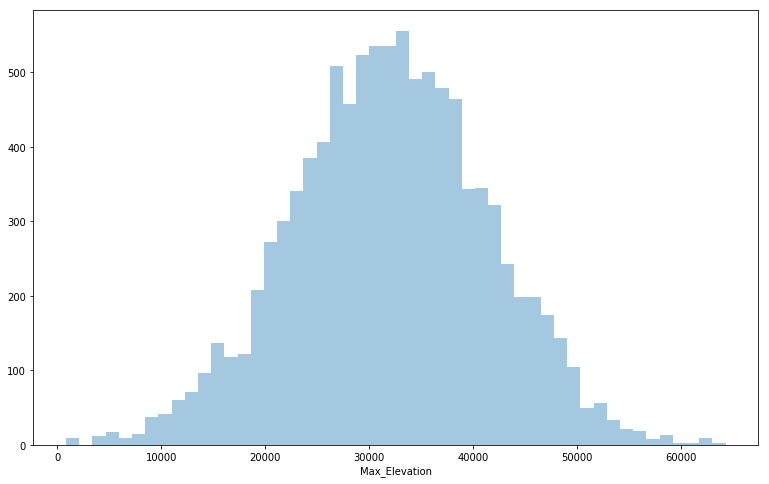

In [68]:
plt.figure(figsize=(13,8))
sns.distplot(df1['Max_Elevation'], kde=False)
plt.show()

In [69]:
df1['Max_Elevation'].skew()

-0.03819499588446274

In [70]:
df1.describe()

,Safety_Score,Days_Since_Inspection,Total_Safety_Complaints,Control_Metric,Turbulence_In_gforces,Cabin_Temperature,Accident_Type_Code,Max_Elevation,Violations,Adverse_Weather_Metric,Severity
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000
mean,41.845995,12.931100,1.618007,65.170433,0.380183,4.393500,3.814900,32001.803282,2.01220,-2.704593,1.410400
std,16.046736,3.539803,0.941947,11.776238,0.117398,0.033646,1.902577,9431.995196,1.03998,1.928940,1.182249
min,0.000000,1.000000,0.000000,32.315406,0.134000,4.327306,1.000000,831.695553,0.00000,-8.058430,0.000000
25%,30.593607,11.000000,1.098612,56.927985,0.293665,4.368941,2.000000,25757.636908,1.00000,-4.417639,0.000000
50%,41.278539,13.000000,1.609438,65.587967,0.365879,4.388754,4.000000,32060.336419,2.00000,-2.597395,1.000000
75%,52.511416,15.000000,2.302585,73.336372,0.451346,4.413525,5.000000,38380.641513,3.00000,-1.038293,3.000000
max,85.388128,23.000000,4.007333,97.948952,0.687868,4.590158,7.000000,64297.651218,5.00000,0.860938,3.000000


In [71]:
df2.describe()

,Safety_Score,Days_Since_Inspection,Total_Safety_Complaints,Control_Metric,Turbulence_In_gforces,Cabin_Temperature,Accident_Type_Code,Max_Elevation,Violations,Adverse_Weather_Metric
count,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000
mean,41.805130,12.946400,1.607254,65.388694,0.374775,4.393812,3.853600,32383.134179,1.990800,-2.730301
std,16.219049,3.523364,0.951689,11.361209,0.112781,0.033086,1.877652,9485.096436,1.018592,1.910517
min,0.000000,1.000000,0.000000,34.577256,0.143376,4.327306,1.000000,831.695553,0.000000,-7.908784
25%,30.593607,11.000000,0.693147,57.702826,0.292583,4.368561,2.000000,26008.851717,1.000000,-4.332438
50%,41.461187,13.000000,1.609438,66.066545,0.357404,4.389499,4.000000,32472.865497,2.000000,-2.624640
75%,52.751142,15.000000,2.302585,73.119872,0.441699,4.413162,5.000000,38759.519071,3.000000,-1.153894
max,85.987443,23.000000,4.007333,96.245442,0.665374,4.555980,7.000000,62315.408444,5.000000,0.860938


In [72]:
X_train = df1.iloc[:,0:10].values
y_train = df1.iloc[:,10].values
X_test = df2.iloc[:,0:10].values

In [73]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,ExtraTreesClassifier,GradientBoostingClassifier,AdaBoostClassifier,VotingClassifier
from sklearn.model_selection import GridSearchCV,cross_val_score
from xgboost import XGBClassifier

In [74]:
RFC = RandomForestClassifier()

rf_param_grid = {"max_depth": [None],
              "min_samples_split": [2, 3, 10],
              "min_samples_leaf": [1, 3, 10],
              "bootstrap": [False],
              "n_estimators" :[100,300],
              "criterion": ["gini"]}


gsRFC = GridSearchCV(RFC,param_grid = rf_param_grid, cv=10, scoring="accuracy", n_jobs= -1)
gsRFC.fit(X_train,y_train)

RFC_best = gsRFC.best_estimator_
gsRFC.best_params_
gsRFC.best_score_

0.9456

In [75]:
DTC = DecisionTreeClassifier()

adaDTC = AdaBoostClassifier(DTC, random_state = 0)

ada_param_grid = {"base_estimator__criterion" : ["gini", "entropy"],
              "base_estimator__splitter" :   ["best", "random"],
              "algorithm" : ["SAMME","SAMME.R"],
              "n_estimators" :[1,2],
              "learning_rate":  [0.0001, 0.001, 0.01, 0.1, 0.2, 0.3,1.5]}

gsadaDTC = GridSearchCV(adaDTC,param_grid = ada_param_grid, cv=10, scoring="accuracy", n_jobs= -1)

gsadaDTC.fit(X_train,y_train)

gsadaDTC.best_score_


ada_best = gsadaDTC.best_estimator_

In [76]:
gsadaDTC.best_score_

0.9375

In [77]:
xgc = XGBClassifier(silent = False,scale_pos_weight = 2,learning_rate = 0.03,colsample_bytree = 0.8,subsample = 0.8,n_estimators = 400,reg_alpha = 0.3,max_depth = 8,gamma = 1)
xgc.fit(X_train,y_train)
xgc.score(X_train,y_train)

0.9895

In [78]:
yxgb = xgc.predict(X_test)

In [79]:
yxgb = pd.DataFrame(yxgb,columns = ['Severity'])
yxgb['Severity'] = yxgb['Severity'].map(mp)
yxgb.describe()

,Severity
count,2500
unique,4
top,Highly_Fatal_And_Damaging
freq,756


In [80]:
ansxgb = pd.concat([aid,yxgb],axis = 1)
ansxgb.to_csv("subxgb.csv",index = False)

In [81]:
vc = VotingClassifier(estimators = [('rfc',RFC_best ),('dtc',ada_best),('xgc',xgc)], voting = 'soft',n_jobs = -1)
vc.fit(X_train,y_train)
y_predvc = vc.predict(X_test)


In [82]:
vc.score(X_train,y_train)


1.0

In [83]:
print(y_predvc)

[0 2 3 ... 3 3 0]


In [84]:
y_predvc = pd.DataFrame(y_predvc,columns = ['Severity'])
y_predvc['Severity'] = y_predvc['Severity'].map(mp)
y_predvc.describe()

,Severity
count,2500
unique,4
top,Highly_Fatal_And_Damaging
freq,754


In [85]:
ans = pd.concat([aid,y_predvc],axis = 1)

In [86]:
print(ans)

      Accident_ID                                 Severity
0               1                Highly_Fatal_And_Damaging
1              10        Significant_Damage_And_Fatalities
2              14  Significant_Damage_And_Serious_Injuries
3              17                Highly_Fatal_And_Damaging
4              21        Significant_Damage_And_Fatalities
...           ...                                      ...
2495        12484                Highly_Fatal_And_Damaging
2496        12487  Significant_Damage_And_Serious_Injuries
2497        12488  Significant_Damage_And_Serious_Injuries
2498        12491  Significant_Damage_And_Serious_Injuries
2499        12493                Highly_Fatal_And_Damaging

[2500 rows x 2 columns]


In [87]:
ans.to_csv("subvc.csv",index = False)